<a href="https://colab.research.google.com/github/trodman201/PCOS-Research/blob/code/PCOS_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.5.3'

In [2]:
df = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [3]:
print(df.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [4]:
#recalculate fsh ratio bc its null in dataset
df['FSH Ratio']=df['FSH(mIU/mL)']/df['LH(mIU/mL)']

In [6]:
#recalc bmi because some cases dont have the value
df['New BMI'] = df['Weight (Kg)'] / (df['Height(Cm)'] ** 2) * 10000
#[weight (kg) / height (cm) / height (cm)] x 10,000

In [7]:
new_df = df[['PCOS (Y/N)','Weight (Kg)', 'New BMI','FSH Ratio']]
new_df

,PCOS (Y/N),Weight (Kg),New BMI,FSH Ratio
0,0,44.6,19.304017,2.160326
1,0,65.0,24.921163,6.174312
2,1,68.8,25.270891,6.295455
3,0,65.0,29.674945,3.415254
4,0,52.0,20.060954,4.422222
...,...,...,...,...
536,0,50.0,18.456637,5.558011
537,0,63.2,25.316456,1.785211
538,0,54.0,23.372576,4.302158
539,0,50.0,22.222222,1.016166


In [9]:
print(df[['Weight (Kg)', 'Height(Cm)', 'New BMI']].head())

   Weight (Kg)  Height(Cm)    New BMI
0         44.6       152.0  19.304017
1         65.0       161.5  24.921163
2         68.8       165.0  25.270891
3         65.0       148.0  29.674945
4         52.0       161.0  20.060954


<Axes: xlabel='PCOS (Y/N)', ylabel='New BMI'>

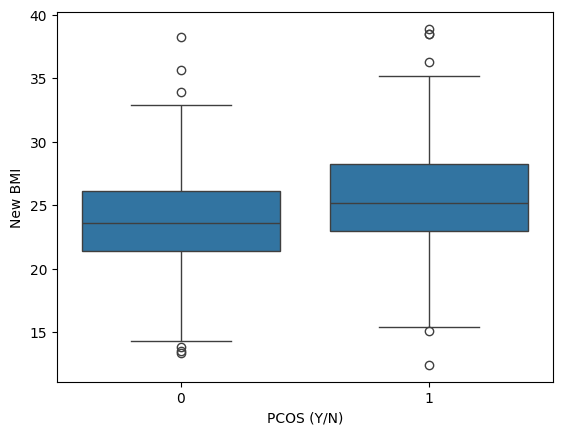

In [10]:
import seaborn as sns
sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=new_df)

bmi metrics:  
BMI	Weight Status

Below 18.5	Underweight

18.5 – 24.9	Healthy Weight (rounded)

25.0 – 29.9	Overweight (rounded)

30.0 and Above	Obesity

With PCOS

In [11]:
pcos = new_df[new_df['PCOS (Y/N)'].isin([1])]
pcos

,PCOS (Y/N),Weight (Kg),New BMI,FSH Ratio
2,1,68.8,25.270891,6.295455
12,1,74.0,32.029086,1.324503
19,1,85.0,31.221304,2.333333
24,1,63.0,25.236340,6.000000
26,1,76.0,29.687500,2.223022
...,...,...,...,...
520,1,50.0,17.715420,2.111111
523,1,60.0,26.666667,5.710000
524,1,70.0,24.026586,2.107843
533,1,53.5,20.500862,0.796137


In [12]:
no_pcos = new_df[new_df['PCOS (Y/N)'].isin([0])]

In [13]:
# Drop rows where 'BMI' is over 19
p1 = new_df[new_df['PCOS (Y/N)'].isin([1])]
p1 = p1[p1['New BMI'] <= 19]
p1

,PCOS (Y/N),Weight (Kg),New BMI,FSH Ratio
76,1,43.0,18.611496,2.407767
123,1,40.0,17.777778,0.970874
221,1,31.0,12.417882,0.601810
237,1,42.0,17.709563,2.129450
293,1,36.0,15.378700,0.831703
306,1,40.0,16.649324,4.433735
342,1,40.0,16.023073,2.074074
392,1,45.0,18.025957,1.758958
451,1,44.0,16.860522,17.934783
457,1,38.0,15.126797,0.601810


In [14]:
#healthy weight
p2 = new_df[new_df['PCOS (Y/N)'].isin([1])]
p2 = p2[(p2['New BMI'] >= 19) & (p2['New BMI'] <= 25)]
p2

,PCOS (Y/N),Weight (Kg),New BMI,FSH Ratio
29,1,56.0,24.238227,2.025210
44,1,59.0,23.634033,4.126582
49,1,51.0,21.504470,0.941667
50,1,68.0,22.985398,0.806569
52,1,50.0,20.284799,1.731051
...,...,...,...,...
486,1,49.1,19.421700,1.134529
493,1,50.0,21.082813,29.730769
509,1,54.0,23.372576,7.702703
524,1,70.0,24.026586,2.107843


In [15]:
#overweight
p3 = new_df[new_df['PCOS (Y/N)'].isin([1])]
# Drop rows where 'BMI' is less than 25
p3 = p3[(p3['New BMI'] >= 25)]
p3
p3.dropna()

,PCOS (Y/N),Weight (Kg),New BMI,FSH Ratio
2,1,68.8,25.270891,6.295455
12,1,74.0,32.029086,1.324503
19,1,85.0,31.221304,2.333333
24,1,63.0,25.236340,6.000000
26,1,76.0,29.687500,2.223022
...,...,...,...,...
489,1,63.0,30.808352,3.029915
495,1,64.0,26.638918,4.449612
512,1,72.0,26.446281,3.736842
523,1,60.0,26.666667,5.710000


No PCOS


In [26]:
#underweight no pcos
n1 = new_df[new_df['PCOS (Y/N)'].isin([0])]
n1 = n1[n1['New BMI'] <= 19]
n1
n1.count()

PCOS (Y/N)     28
Weight (Kg)    28
New BMI        28
FSH Ratio      28
dtype: int64

In [17]:
n2 = new_df[new_df['PCOS (Y/N)'].isin([0])]
n2 = n2[(n2['New BMI'] >= 19) & (n2['New BMI'] <= 25)]
n2

,PCOS (Y/N),Weight (Kg),New BMI,FSH Ratio
0,0,44.6,19.304017,2.160326
1,0,65.0,24.921163,6.174312
4,0,52.0,20.060954,4.422222
7,0,58.5,23.139907,1.583062
9,0,52.0,23.111111,1.854305
...,...,...,...,...
530,0,61.0,24.435187,3.657480
532,0,56.0,22.292122,2.017647
534,0,48.0,19.107533,0.398721
538,0,54.0,23.372576,4.302158


In [18]:
n3 = new_df[new_df['PCOS (Y/N)'].isin([0])]
# Drop rows where 'BMI' is less than 25
n3 = n3[(n3['New BMI'] >= 25)]
n3

,PCOS (Y/N),Weight (Kg),New BMI,FSH Ratio
3,0,65.0,29.674945,3.415254
5,0,74.1,27.217631,3.028037
6,0,64.0,26.298488,9.193548
10,0,71.0,26.722873,2.420792
15,0,80.5,33.943329,3.788845
...,...,...,...,...
521,0,78.0,32.466181,2.838509
528,0,58.0,27.096649,2.619565
531,0,70.0,26.026175,3.318841
535,0,80.0,30.655494,2.017143


Text(0.5, 1.0, 'Underweight Groups')

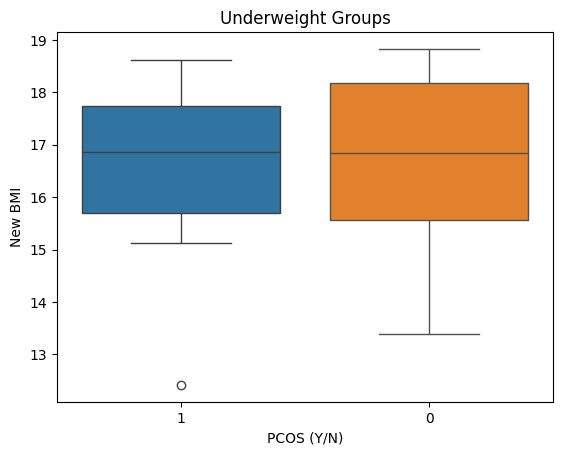

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=p1)
sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=n1)
plt.title('Underweight Groups')



Text(0.5, 1.0, 'Healthy weight Groups')

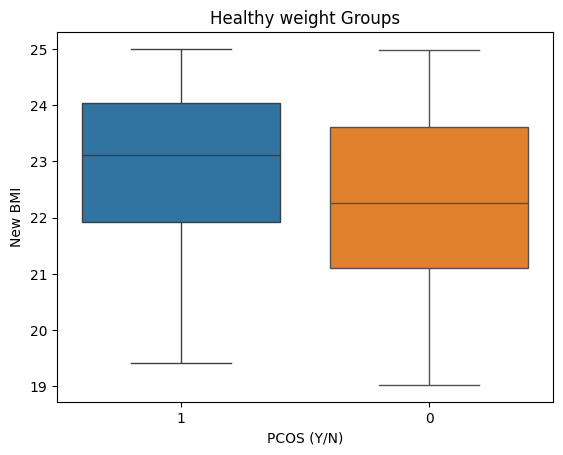

In [20]:

sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=p2)
sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=n2)
plt.title('Healthy weight Groups')

Text(0.5, 1.0, 'Overweight Groups')

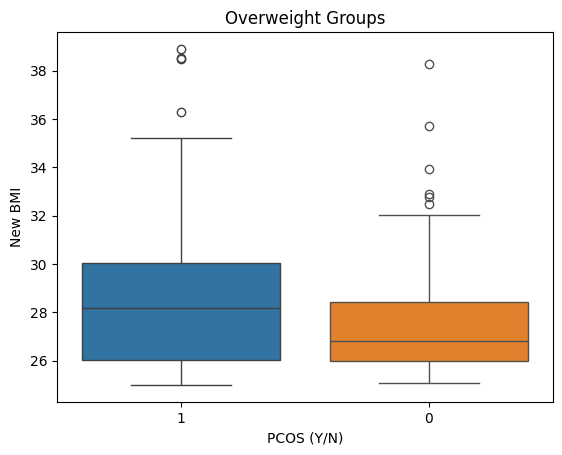

In [21]:

sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=p3)
sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=n3)
plt.title('Overweight Groups')


Text(0.5, 1.0, 'PCOS VS No PCOS by BMI')

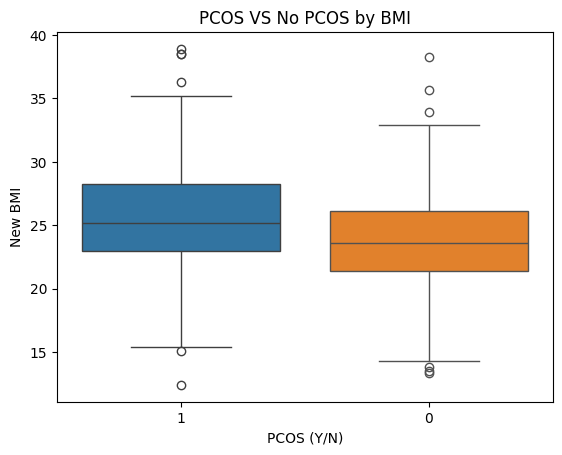

In [22]:
sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=pcos)
sns.boxplot(x="PCOS (Y/N)", y="New BMI", data=no_pcos)
plt.title('PCOS VS No PCOS by BMI')

Text(0.5, 1.0, 'Underweight Groups and their FSH Levels')

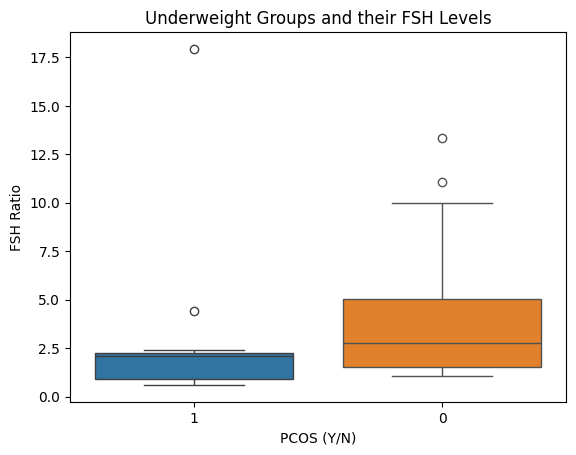

In [24]:
sns.boxplot(x="PCOS (Y/N)", y="FSH Ratio", data=p1)
sns.boxplot(x="PCOS (Y/N)", y="FSH Ratio", data=n1)
plt.title('Underweight Groups and their FSH Levels')

Text(0.5, 1.0, 'Overweight Groups and their FSH Levels')

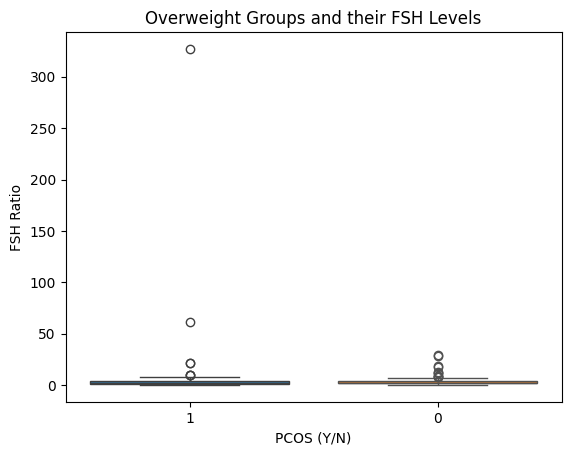

In [23]:
sns.boxplot(x="PCOS (Y/N)", y="FSH Ratio", data=p3)
sns.boxplot(x="PCOS (Y/N)", y="FSH Ratio", data=n3)
plt.title('Overweight Groups and their FSH Levels')

In [27]:
#part 1
#N total of patients : 542 patients
#n how many in the analysis:  in nopcos = 133 + 203 + 28 = 364
#n in pcos = 93 + 73 + 11 = 177
#n total = 177 + 364 = 541

#ratio fsh/lh : normal range of FSH then LH using publications

References

Eddie Racoubian, Gulzhanat Aimagambetova, Ramzi R. Finan, & Wassim Y. Almawi. (2020). Age-dependent changes in anti-Müllerian hormone levels in Lebanese females: correlation with basal FSH and LH levels and LH/FSH ratio: a cross-sectional study. BMC Women’s Health, 20(1), 1–6. https://doi.org/10.1186/s12905-020-00998-4

Normal range of

 FSH: 7.96 (0.09–177.80)


LH: 7.02 (0.10–113.60)

FSH/LH: 1.13




In [31]:
#part 2
#PCOS min Q1 median Q3 max of ratio
#no PCOS min Q1 median Q3 max of ratio
import numpy as np

pcos_data = np.array([pcos])
no_pcos_data = np.array([no_pcos])

# Function to calculate ratio for a given group
def calculate_ratio(data):
    ratio = np.divide(data[0], data[1])
    return ratio

# Calculate ratio for PCOS and no PCOS groups
pcos_ratio = calculate_ratio(pcos_data)
no_pcos_ratio = calculate_ratio(no_pcos_data)

# Function to calculate quartiles
def calculate_quartiles(data):
    q1 = np.percentile(data, 25)
    median_val = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    return q1, median_val, q3

pcos_quartiles = calculate_quartiles(pcos_ratio)
no_pcos_quartiles = calculate_quartiles(no_pcos_ratio)

print("PCOS Quartiles: ", pcos_quartiles)
print("No PCOS Quartiles: ", no_pcos_quartiles)


IndexError: index 1 is out of bounds for axis 0 with size 1

The Question we what to answer:


> PCOS is a disease that affects women, one of the main treatments is to loose weight. Doctors put the blame on patients symtomes because of there weight (poor exercise and eating habits). It is known that PCOS is closely related to diabetes, both of these conditions are genetic. Lossing weight for people with PCOS can seem impossible compared to people that are not genetically predisposed to these conditions.




Our Plan

1.   Clean data
2.   Compare paients with PCOS that are overweight compaired to underweight. and how the symptoms compare to see the impact of lossing weight.    


revised: compare patients with pcos and those without pcos and see how their symptoms significantly differ. The data only has the before information and no after. We could compare different metrics by what the data gives us. Or find another dataset with the data that we want, besides changing the perameters of our data.

